# Setup

In [1]:
import sys
sys.path.append('../../')

import CCfrag

# Creating queries for AlphaFold

In [2]:
INPUT_FASTA = 'TETRABRACHION.fasta'

In [3]:
for win_len, overlap in [[70, 35], [50,25], [30,15], [20,10]]:
	for nmer in [4]:
		divider = CCfrag.Divider(L=win_len, O=overlap, nmer=nmer)
		divider.generate_queries(INPUT_FASTA, 'CCfrag_constructs_TETRABRACHION', format='single_fasta')

>TETRABRACHION AAC44118.1 tetrabrachion [Staphylothermus marinus F1]
>TETRABRACHION AAC44118.1 tetrabrachion [Staphylothermus marinus F1]
>TETRABRACHION AAC44118.1 tetrabrachion [Staphylothermus marinus F1]
>TETRABRACHION AAC44118.1 tetrabrachion [Staphylothermus marinus F1]


In [4]:
!ls CCfrag_constructs_TETRABRACHION/TETRABRACHION/

4_20_10  4_30_15  4_50_25  4_70_35  source_TETRABRACHION.fasta


In [6]:
!ls  CCfrag_constructs_TETRABRACHION/TETRABRACHION/4_20_10/

constructs.csv	parameters.json  queries


In [7]:
!ls CCfrag_constructs_TETRABRACHION/TETRABRACHION/4_20_10/queries/

TETRABRACHION_4_0-20.fasta	 TETRABRACHION_4_30-50.fasta
TETRABRACHION_4_1000-1020.fasta  TETRABRACHION_4_310-330.fasta
TETRABRACHION_4_100-120.fasta	 TETRABRACHION_4_320-340.fasta
TETRABRACHION_4_1010-1030.fasta  TETRABRACHION_4_330-350.fasta
TETRABRACHION_4_1020-1040.fasta  TETRABRACHION_4_340-360.fasta
TETRABRACHION_4_1030-1050.fasta  TETRABRACHION_4_350-370.fasta
TETRABRACHION_4_10-30.fasta	 TETRABRACHION_4_360-380.fasta
TETRABRACHION_4_1040-1060.fasta  TETRABRACHION_4_370-390.fasta
TETRABRACHION_4_1050-1070.fasta  TETRABRACHION_4_380-400.fasta
TETRABRACHION_4_1060-1080.fasta  TETRABRACHION_4_390-410.fasta
TETRABRACHION_4_1070-1090.fasta  TETRABRACHION_4_400-420.fasta
TETRABRACHION_4_1080-1100.fasta  TETRABRACHION_4_40-60.fasta
TETRABRACHION_4_1090-1110.fasta  TETRABRACHION_4_410-430.fasta
TETRABRACHION_4_1100-1120.fasta  TETRABRACHION_4_420-440.fasta
TETRABRACHION_4_110-130.fasta	 TETRABRACHION_4_430-450.fasta
TETRABRACHION_4_1110-1130.fasta  TETRABRACHION_4_440-460.fasta
TETRABRAC

# Running AlphaFold

In [9]:
%%bash

cd CCfrag_constructs_TETRABRACHION/TETRABRACHION/
ROOT_FOLDER=$(pwd)

for i in $(ls -d */)
do
echo $i
cd $ROOT_FOLDER
cd $i

# this line will predict models for all the FASTA files inside the 'queries' folder,
# and output the resulting files to the 'predictions' folder
colabfold_batch queries predictions --num-recycle=5

done

4_20_10/
4_30_15/
4_50_25/
4_70_35/


In [3]:
!du -h -d 1 | grep CCfrag

659M	./CCfrag_constructs_TETRABRACHION


# Creating the CCfrag assembly

In [3]:
import matplotlib.pyplot as plt

## ColabFold

In [7]:
integrator = CCfrag.Integrator(path_fragments='CCfrag_constructs_TETRABRACHION/TETRABRACHION/',
                               list_features=['plddt', 'para', 'kih', 'pae'],
                               data_output='DATA_CCfrag.csv')

In [8]:
list_specifications, full_sequence, df_data_sequence = integrator.run_assembly_analysis()

Commencing analysis of TETRABRACHION ...
TETRABRACHION read as a sequence of length 1524
Found 4 specification folders:
* 4_20_10/
* 4_30_15/
* 4_50_25/
* 4_70_35/


In [9]:
df_data_sequence

,residue_name,residue_number,4_20_10_plddt,4_20_10_para,4_20_10_kih,4_20_10_pae,4_30_15_plddt,4_30_15_para,4_30_15_kih,4_30_15_pae,4_50_25_plddt,4_50_25_para,4_50_25_kih,4_50_25_pae,4_70_35_plddt,4_70_35_para,4_70_35_kih,4_70_35_pae
0,M,0,32.7325,1.0,0.0,13.008059,45.5000,1.0,0.0,12.150213,51.8900,0.0,0.0,18.200509,23.1200,0.0,0.0,21.995173
1,N,1,41.9350,1.0,0.0,13.008059,54.4350,1.0,0.0,12.150213,53.9600,0.0,0.0,18.200509,26.0850,0.0,0.0,21.995173
2,R,2,48.4775,1.0,0.0,13.008059,51.4700,1.0,0.0,12.150213,53.9075,0.0,0.0,18.200509,29.4250,0.0,0.0,21.995173
3,V,3,48.2375,1.0,0.0,13.008059,52.2800,1.0,0.0,12.150213,50.2875,0.0,0.0,18.200509,31.5700,0.0,0.0,21.995173
4,L,4,47.7025,1.0,0.0,13.008059,54.1775,1.0,0.0,12.150213,51.5725,0.0,0.0,18.200509,28.4850,0.0,0.0,21.995173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519,R,1519,41.7925,1.0,0.0,10.726616,49.5075,1.0,0.0,10.202875,52.6325,1.0,0.0,7.207051,62.5625,1.0,0.0,6.263976
1520,R,1520,42.6250,1.0,0.0,11.167380,46.3975,1.0,0.0,10.202875,48.2250,1.0,0.0,7.207051,56.5875,1.0,0.0,6.263976
1521,R,1521,35.4750,1.0,0.0,11.167380,41.3425,1.0,0.0,10.202875,42.3600,1.0,0.0,7.207051,52.4700,1.0,0.0,6.263976
1522,V,1522,37.0800,1.0,0.0,11.167380,39.8650,1.0,0.0,10.202875,42.2600,1.0,0.0,7.207051,49.6075,1.0,0.0,6.263976


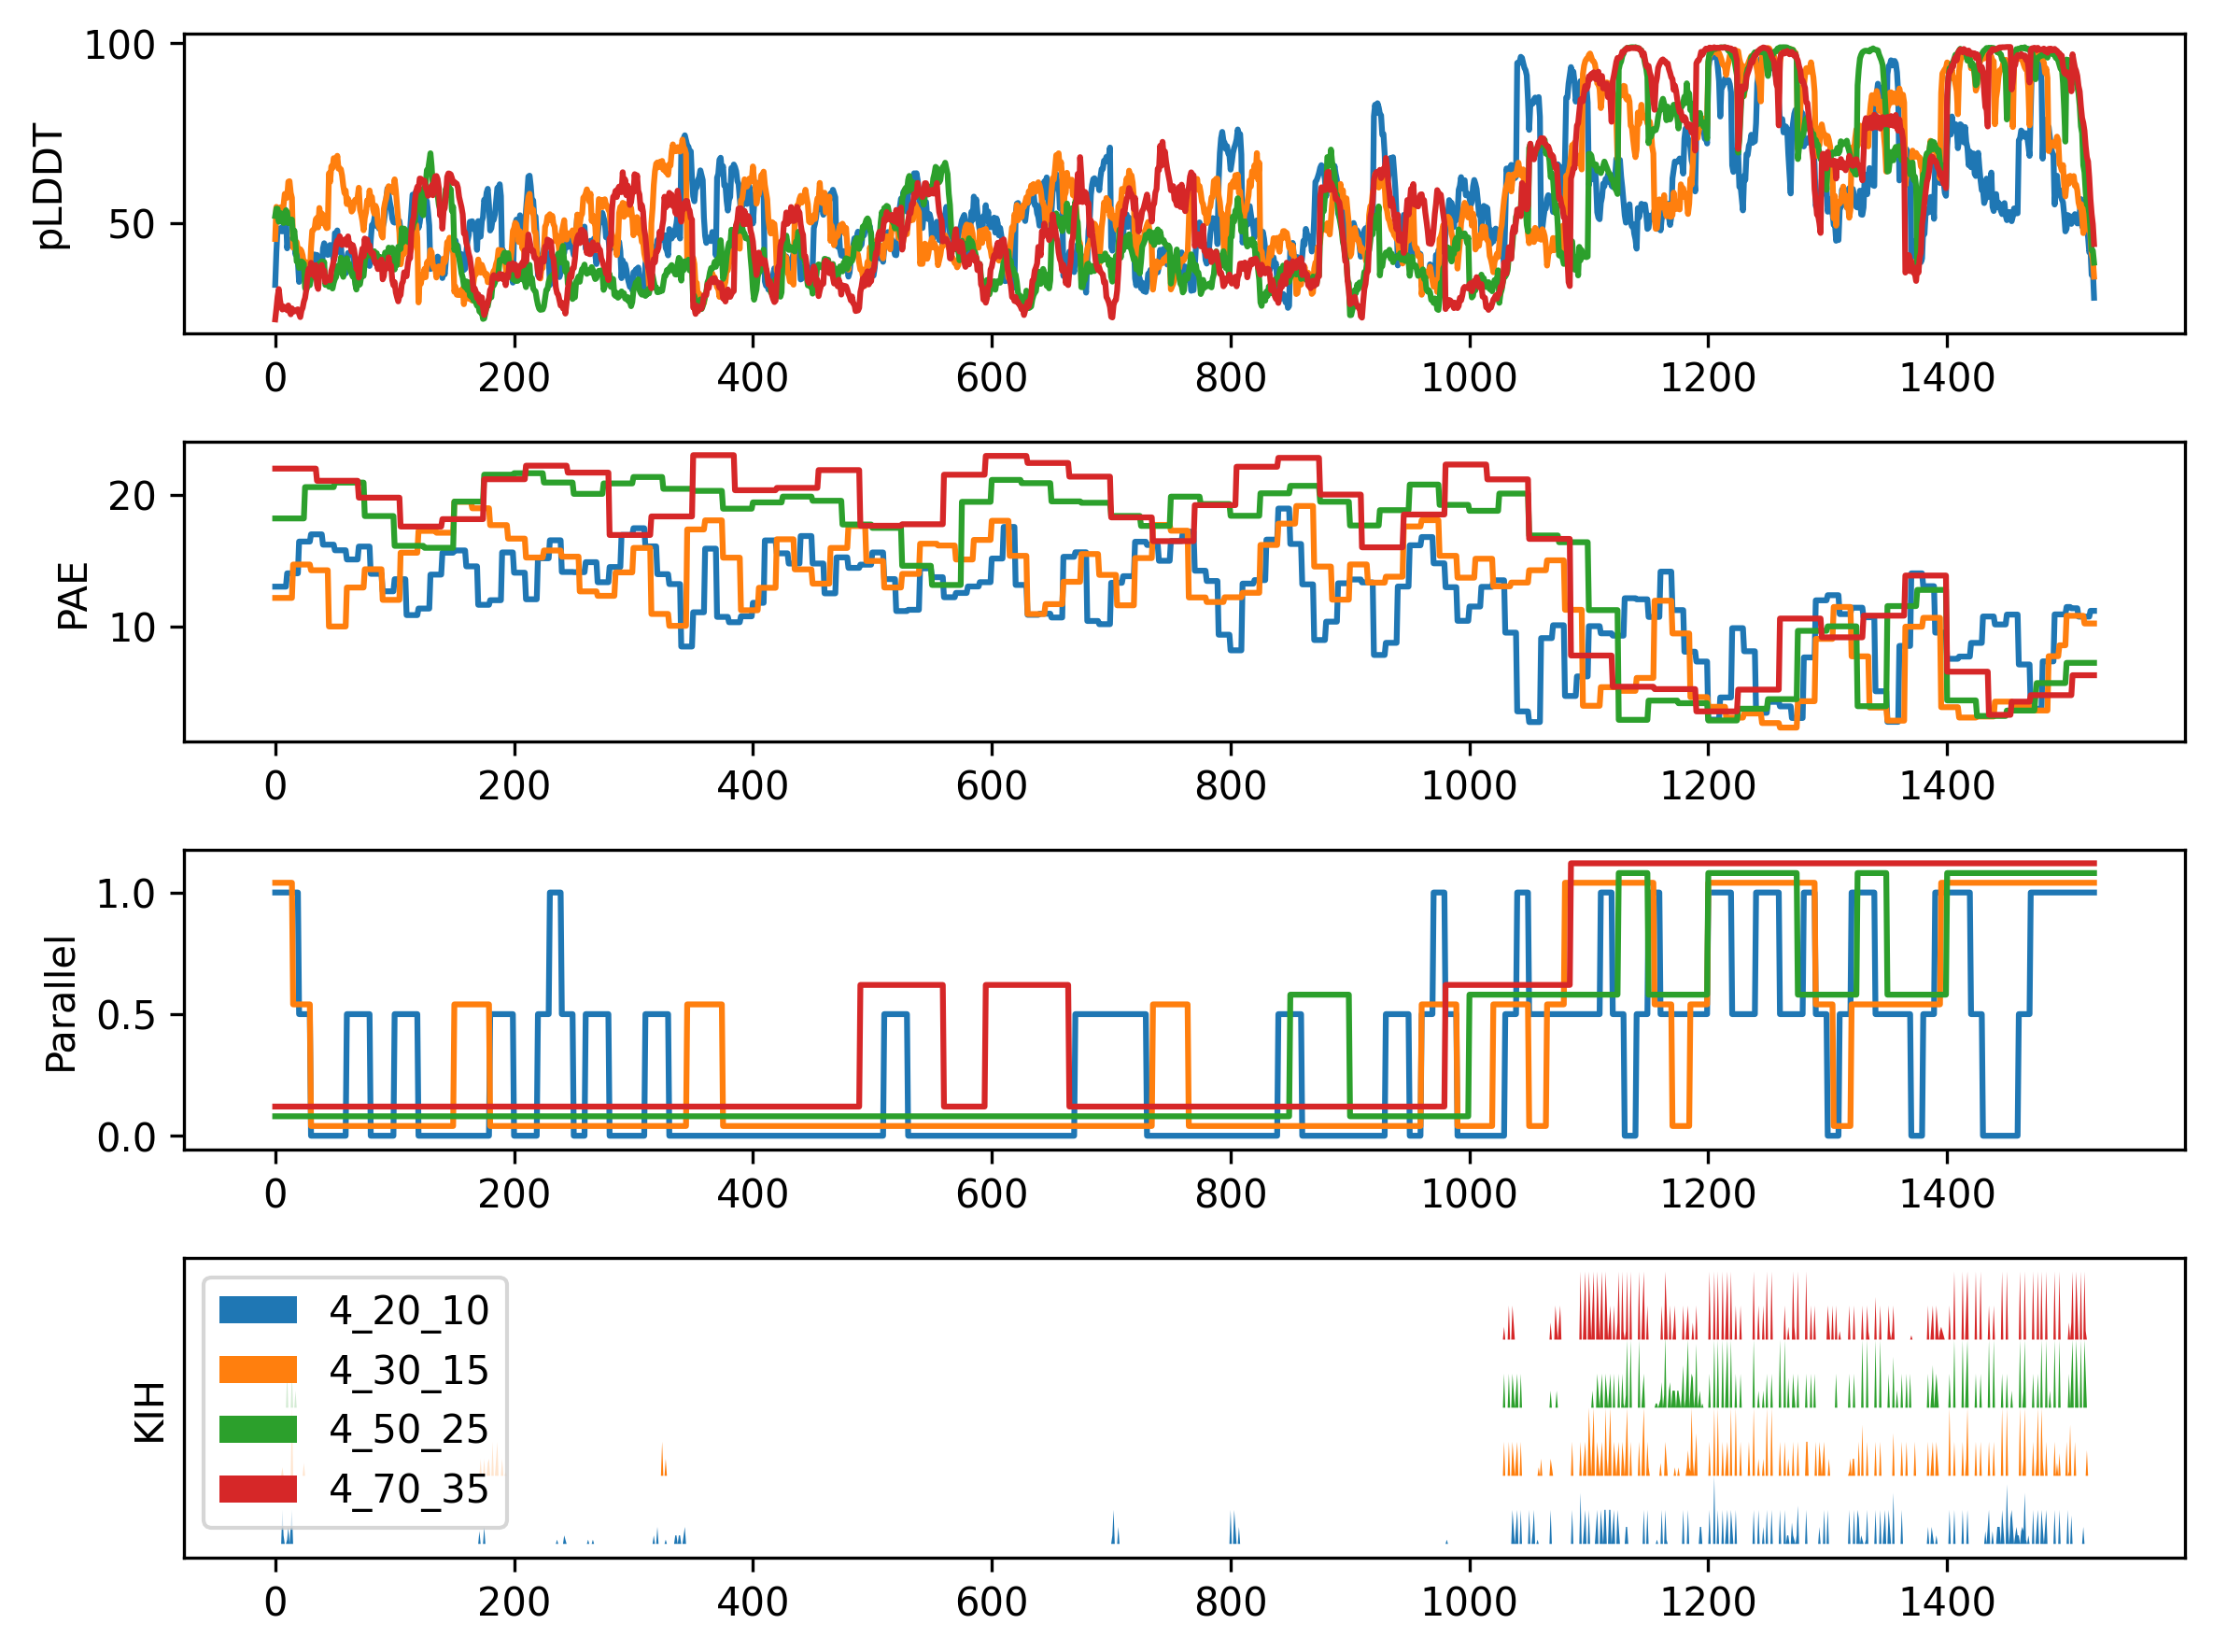

In [17]:
list_specifications = [i.replace('/','') for i in list_specifications if '_' in i]

fig, axarr = plt.subplots(nrows=4, ncols=1, figsize=(8,6), dpi=300)

for i_spec, specification in enumerate(list_specifications):
    axarr[0].plot(df_data_sequence[f'{specification}_plddt'], label=specification)
    axarr[1].plot(df_data_sequence[f'{specification}_pae'], label=specification)
    axarr[2].plot(df_data_sequence[f'{specification}_para']+0.04*i_spec, label=specification)
    kih_data = df_data_sequence[f'{specification}_kih'].to_numpy()
    axarr[3].fill_between(x=range(len(full_sequence)), y1=i_spec*2, y2=i_spec*2+kih_data, label=specification)
    
    axarr[0].set_ylabel('pLDDT')
    axarr[1].set_ylabel('PAE')
    axarr[2].set_ylabel('Parallel')
    axarr[3].set_ylabel('KIH')
    axarr[3].set_yticks([])

plt.legend()
plt.tight_layout()
#plt.vlines(x=580, ymin=0,ymax=100)